In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

##### torch.multinomial.Multinomial:多项分布 multinomial(n,p)

In [3]:
fair_probs = torch.ones([6]) / 6
fair_probs,multinomial.Multinomial(1, fair_probs).sample()

(tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667]),
 tensor([0., 0., 0., 1., 0., 0.]))

In [12]:
counts = multinomial.Multinomial(10000,fair_probs).sample()
counts/10000

tensor([0.1635, 0.1627, 0.1671, 0.1702, 0.1703, 0.1662])

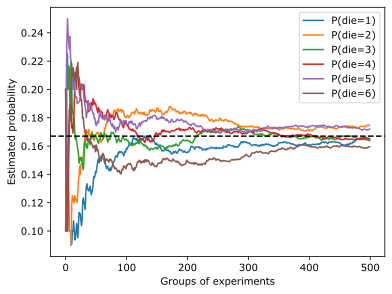

In [11]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,)) # sample500次，每次10个数 ,大小为(500,6)
cum_counts = counts.cumsum(dim=0) # cumulative sum,dim=0, 行方向累加
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True) # 把每一行变成一个概率

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();